# Hub
Hub provides same interface for several backends. Let see how it works.

## Select Backends
You can check what frameworks and models the `waffle_hub` provides.


In [1]:
from waffle_hub.hub import Hub
from waffle_hub.type import TaskType

Hub.get_available_backends()

[<BackendType.ULTRALYTICS: 'ultralytics'>,
 <BackendType.AUTOCARE_DLT: 'autocare_dlt'>,
 <BackendType.TRANSFORMERS: 'transformers'>]

### Ultraytics

In [2]:
Hub.get_available_tasks("ultralytics")

[<TaskType.OBJECT_DETECTION: 'object_detection'>,
 <TaskType.CLASSIFICATION: 'classification'>,
 <TaskType.INSTANCE_SEGMENTATION: 'instance_segmentation'>]

In [3]:
Hub.get_available_model_types("ultralytics", "OBJECT_DETECTION")

['yolov8', 'yolov5']

In [4]:
Hub.get_available_model_sizes("ultralytics", "OBJECT_DETECTION", "yolov8")

['n', 's', 'm', 'l', 'x']

### Transformers

In [5]:
Hub.get_available_tasks("transformers")

[<TaskType.OBJECT_DETECTION: 'object_detection'>,
 <TaskType.CLASSIFICATION: 'classification'>]

In [6]:
Hub.get_available_model_types("transformers", "OBJECT_DETECTION")

['DETR', 'DETA', 'YOLOS']

In [7]:
Hub.get_available_model_sizes("transformers", "OBJECT_DETECTION", "DETR")

['base', 'large', 'conditional', 'deformable']

### Autocare DLT

In [8]:
Hub.get_available_tasks("autocare_dlt")

2024-01-04 17:06:24.197 | WARNING  | autocare_dlt.core.dataset.utils.coco_eval:<module>:13 - Install fast-coco-eval is recommended, now using pycocotools.


[<TaskType.OBJECT_DETECTION: 'object_detection'>,
 <TaskType.CLASSIFICATION: 'classification'>,
 <TaskType.TEXT_RECOGNITION: 'text_recognition'>,
 <TaskType.SEMANTIC_SEGMENTATION: 'semantic_segmentation'>]

In [9]:
Hub.get_available_model_types("autocare_dlt", "OBJECT_DETECTION")

['YOLOv5']

In [10]:
Hub.get_available_model_sizes("autocare_dlt", "OBJECT_DETECTION", "YOLOv5")

['s', 'm', 'l']

## Create New Hub (Ultraytics)
By calling `Hub.new()` method you can simply create an hub instance.

<img src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png" />

In [11]:
ultralytics_hub = Hub.new(
    name="ultralytics_mnist_detection",
    backend="ultralytics",
    task="object_detection",
    model_type="yolov8",
    model_size="n",
)

/home/snuailab/Desktop/waffle_hub/waffle_hub/hub/manager/base_manager.py:168: UserWarning: Categories is not specified.
It follows the categories of Dataset when the training starts.
  warnings.warn(


`Hub` instance provides several useful properties and methods. See [Hub Documentation](../../waffle_hub/hub/hub.md) for more details.

In [12]:
ultralytics_hub.manager.MODEL_TYPES

{<TaskType.OBJECT_DETECTION: 'object_detection'>: {'yolov8': {'n': 'yolov8n.pt',
   's': 'yolov8s.pt',
   'm': 'yolov8m.pt',
   'l': 'yolov8l.pt',
   'x': 'yolov8x.pt'},
  'yolov5': {'n': 'yolov5nu.pt',
   's': 'yolov5su.pt',
   'm': 'yolov5mu.pt',
   'l': 'yolov5lu.pt',
   'x': 'yolov5xu.pt',
   'n6': 'yolov5n6u.pt',
   's6': 'yolov5s6u.pt',
   'm6': 'yolov5m6u.pt',
   'l6': 'yolov5l6u.pt',
   'x6': 'yolov5x6u.pt'}},
 <TaskType.CLASSIFICATION: 'classification'>: {'yolov8': {'n': 'yolov8n-cls.pt',
   's': 'yolov8s-cls.pt',
   'm': 'yolov8m-cls.pt',
   'l': 'yolov8l-cls.pt',
   'x': 'yolov8x-cls.pt'}},
 <TaskType.INSTANCE_SEGMENTATION: 'instance_segmentation'>: {'yolov8': {'n': 'yolov8n-seg.pt',
   's': 'yolov8s-seg.pt',
   'm': 'yolov8m-seg.pt',
   'l': 'yolov8l-seg.pt',
   'x': 'yolov8x-seg.pt'}}}

In [13]:
ultralytics_hub.get_model_config()

ModelConfig(name='ultralytics_mnist_detection', backend='ultralytics', version='8.0.227', task='object_detection', model_type='yolov8', model_size='n', categories=[])

## Create transformers(huggingface) Hub 

<img src="https://huggingface.co/datasets/huggingface/brand-assets/resolve/main/hf-logo-with-title.png" />

In [14]:
huggingface_hub = Hub.new(
    name="huggingface_mnist_detection",
    backend="transformers",
    task="object_detection",
    model_type="DETR",
    model_size="base",
)

In [15]:
huggingface_hub.manager.MODEL_TYPES

{<TaskType.OBJECT_DETECTION: 'object_detection'>: {'DETR': {'base': 'facebook/detr-resnet-50',
   'large': 'facebook/detr-resnet-101',
   'conditional': 'microsoft/conditional-detr-resnet-50',
   'deformable': 'SenseTime/deformable-detr'},
  'DETA': {'resnet': 'jozhang97/deta-resnet-50',
   'swin': 'jozhang97/deta-swin-large'},
  'YOLOS': {'base': 'hustvl/yolos-base',
   'tiny': 'hustvl/yolos-tiny',
   'small': 'hustvl/yolos-small'}},
 <TaskType.CLASSIFICATION: 'classification'>: {'ResNet': {'50': 'microsoft/resnet-50',
   '18': 'microsoft/resnet-18',
   '101': 'microsoft/resnet-101',
   '152': 'microsoft/resnet-152'},
  'ViT': {'base': 'google/vit-base-patch16-224',
   'tiny': 'WinKawaks/vit-tiny-patch16-224',
   'large': 'google/vit-large-patch16-224'},
  'ConvNextV2': {'base': 'facebook/convnextv2-base-22k-224',
   'tiny': 'facebook/convnextv2-tiny-22k-224',
   'large': 'facebook/convnextv2-large-22k-224',
   'huge': 'facebook/convnextv2-huge-22k-224'},
  'Swinv2': {'base': 'microso

In [16]:
huggingface_hub.get_model_config()

ModelConfig(name='huggingface_mnist_detection', backend='transformers', version='4.34.1', task='object_detection', model_type='DETR', model_size='base', categories=[])

## Create AutocareDLT Hub
`AutocareDLT` Model is a private deep learning framework of *SNUAILAB*. You can use it by asking our team! <br/>
You can also create `AutocareDLT` Hub instance with exactly same way.

<img src="https://github.com/snuailab/assets/blob/main/snuailab/full/snuAiLab.color.300ppi.png?raw=true" />

In [17]:
autocare_dlt_hub = Hub.new(
    name="autocare_dlt_mnist_detection",
    backend="autocare_dlt",
    task="object_detection",
    model_type="YOLOv5",
    model_size="s",
)

/home/snuailab/Desktop/waffle_hub/waffle_hub/hub/manager/adapter/autocare_dlt/autocare_dlt.py:71: UserWarning: You've loaded the Hub created with autocare_dlt==autocare-dlt, 
but the installed version is 0.2.6.
  warnings.warn(


In [18]:
autocare_dlt_hub.manager.MODEL_TYPES

{<TaskType.OBJECT_DETECTION: 'object_detection'>: {'YOLOv5': ['s', 'm', 'l']},
 <TaskType.CLASSIFICATION: 'classification'>: {'Classifier': ['s', 'm', 'l']},
 <TaskType.TEXT_RECOGNITION: 'text_recognition'>: {'TextRecognition': ['s',
   'm',
   'l'],
  'LicencePlateRecognition': ['s', 'm', 'l']},
 <TaskType.SEMANTIC_SEGMENTATION: 'semantic_segmentation'>: {'Segmenter': ['m']}}

In [19]:
autocare_dlt_hub.get_model_config()

ModelConfig(name='autocare_dlt_mnist_detection', backend='autocare_dlt', version='autocare-dlt', task='object_detection', model_type='YOLOv5', model_size='s', categories=[])

(The tutorials are based on "ultralytics" and other backends can be used the same.)
## Train

### Load Dataset
To be replaced (with waffle_dough)

In [20]:
from waffle_hub.dataset import Dataset

# make sample or load
try:
    dataset = Dataset.sample("mnist_det", task=TaskType.OBJECT_DETECTION)
    dataset.split(train_ratio=0.8, val_ratio=0.1, test_ratio=0.1)
except:
    dataset = Dataset.load("mnist_det")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Importing coco dataset: 100%|██████████| 100/100 [00:00<00:00, 2504.71it/s]


### train

In [21]:
result = ultralytics_hub.train(
    dataset=dataset,
    image_size=640,
    epochs=50,
    batch_size=4,
)

result

New https://pypi.org/project/ultralytics/8.0.234 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.227 🚀 Python-3.10.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3070, 7982MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/snuailab/Desktop/waffle_hub/docs/tutorials/datasets/mnist_det/exports/ULTRALYTICS/data.yaml, epochs=50, patience=50, batch=4, imgsz=[640, 640], save=True, save_period=-1, cache=False, device=0, workers=2, project=hubs/ultralytics_mnist_detection, name=artifacts, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid

train: Scanning /home/snuailab/Desktop/waffle_hub/docs/tutorials/datasets/mnist_det/exports/ULTRALYTICS/train/labels... 79 images, 0 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<00:00, 4415.00it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: New cache created: /home/snuailab/Desktop/waffle_hub/docs/tutorials/datasets/mnist_det/exports/ULTRALYTICS/val/labels.cache


val: Scanning /home/snuailab/Desktop/waffle_hub/docs/tutorials/datasets/mnist_det/exports/ULTRALYTICS/val/labels... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<00:00, 3013.87it/s]


Plotting labels to hubs/ultralytics_mnist_detection/artifacts/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to hubs/ultralytics_mnist_detection/artifacts
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      0.69G      1.822      5.281      1.261          1        640: 100%|██████████| 20/20 [00:01<00:00, 16.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.36it/s]


                   all          9          9    0.00333          1      0.269      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.734G       1.46      3.949      1.172          5        640: 100%|██████████| 20/20 [00:00<00:00, 25.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 39.78it/s]


                   all          9          9    0.00333          1      0.659      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.734G      1.215      3.469      1.105          3        640: 100%|██████████| 20/20 [00:00<00:00, 24.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 40.61it/s]


                   all          9          9    0.00336          1      0.709      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.734G      1.232      2.838      1.084          7        640: 100%|██████████| 20/20 [00:00<00:00, 25.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 39.56it/s]


                   all          9          9      0.549      0.528      0.661       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.734G      1.297      2.922      1.138          4        640: 100%|██████████| 20/20 [00:00<00:00, 26.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 39.54it/s]


                   all          9          9      0.363      0.518       0.43      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.734G      1.615      3.675      1.343          2        640: 100%|██████████| 20/20 [00:00<00:00, 26.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 41.46it/s]


                   all          9          9     0.0511        0.2     0.0402    0.00585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.734G      1.274      3.439      1.118          5        640: 100%|██████████| 20/20 [00:00<00:00, 26.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 40.06it/s]


                   all          9          9      0.504      0.125     0.0116    0.00534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.734G      1.344      3.187      1.172          4        640: 100%|██████████| 20/20 [00:00<00:00, 26.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 37.59it/s]


                   all          9          9       0.52      0.442      0.423      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.734G      1.114      2.676      1.024          6        640: 100%|██████████| 20/20 [00:00<00:00, 26.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 40.40it/s]


                   all          9          9       0.51      0.994      0.544      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.734G      1.179      2.848      1.035          5        640: 100%|██████████| 20/20 [00:00<00:00, 24.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 41.00it/s]


                   all          9          9      0.703      0.688      0.797      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.734G      1.321      2.869       1.13          4        640: 100%|██████████| 20/20 [00:00<00:00, 26.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 35.82it/s]


                   all          9          9      0.683      0.982      0.962       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.734G      1.073      2.282      1.011          3        640: 100%|██████████| 20/20 [00:00<00:00, 27.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 40.96it/s]


                   all          9          9      0.961      0.885      0.978      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.734G      1.133      2.143      1.087          2        640: 100%|██████████| 20/20 [00:00<00:00, 27.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 37.22it/s]


                   all          9          9      0.918      0.926      0.995      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.734G      1.035      2.394      1.038          3        640: 100%|██████████| 20/20 [00:00<00:00, 26.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 42.05it/s]


                   all          9          9      0.915          1      0.995      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.734G      1.278      2.525      1.098          4        640: 100%|██████████| 20/20 [00:00<00:00, 26.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 42.29it/s]


                   all          9          9      0.914          1      0.995      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.734G       1.12       2.02       1.03          4        640: 100%|██████████| 20/20 [00:00<00:00, 26.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 40.61it/s]


                   all          9          9      0.985          1      0.995       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.734G       1.03      1.836     0.9985          6        640: 100%|██████████| 20/20 [00:00<00:00, 26.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 39.34it/s]


                   all          9          9      0.985          1      0.995      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.734G      1.069      2.128      1.005          6        640: 100%|██████████| 20/20 [00:00<00:00, 25.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 40.82it/s]


                   all          9          9      0.983          1      0.995      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.734G      0.957      1.706     0.9848          2        640: 100%|██████████| 20/20 [00:00<00:00, 26.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 41.70it/s]


                   all          9          9      0.964          1      0.995      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.734G      1.015      1.783      1.052          2        640: 100%|██████████| 20/20 [00:00<00:00, 26.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 37.79it/s]


                   all          9          9      0.959          1      0.995      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.734G     0.9298      2.976      1.003          3        640: 100%|██████████| 20/20 [00:00<00:00, 25.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 39.18it/s]


                   all          9          9      0.955          1      0.995      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.734G      1.006      2.071       1.02          5        640: 100%|██████████| 20/20 [00:00<00:00, 24.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 40.83it/s]


                   all          9          9      0.949          1      0.995      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.734G     0.9847      1.668      1.011          7        640: 100%|██████████| 20/20 [00:00<00:00, 25.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 39.67it/s]


                   all          9          9      0.974          1      0.995      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.734G     0.8943      1.887     0.9774          3        640: 100%|██████████| 20/20 [00:00<00:00, 25.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 41.02it/s]


                   all          9          9      0.972      0.999      0.995      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.734G     0.8872      1.614     0.9938          5        640: 100%|██████████| 20/20 [00:00<00:00, 25.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 41.67it/s]


                   all          9          9      0.967          1      0.995      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.734G     0.8488      1.626     0.9292          2        640: 100%|██████████| 20/20 [00:00<00:00, 25.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 42.07it/s]


                   all          9          9      0.987          1      0.995      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.734G     0.9375      1.651     0.9823          3        640: 100%|██████████| 20/20 [00:00<00:00, 26.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 43.38it/s]


                   all          9          9      0.978          1      0.995      0.916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.734G     0.8891      1.548      1.009          7        640: 100%|██████████| 20/20 [00:00<00:00, 24.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 40.40it/s]


                   all          9          9      0.981          1      0.995       0.96

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.734G     0.8107      1.592     0.9312          2        640: 100%|██████████| 20/20 [00:00<00:00, 23.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 38.68it/s]


                   all          9          9      0.987          1      0.995      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.734G     0.8249      1.368     0.9427          5        640: 100%|██████████| 20/20 [00:00<00:00, 23.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 44.01it/s]


                   all          9          9       0.99          1      0.995      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.734G     0.7314      1.373     0.9075          4        640: 100%|██████████| 20/20 [00:00<00:00, 23.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 40.21it/s]


                   all          9          9      0.988          1      0.995      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.734G     0.7548      1.301     0.9252          4        640: 100%|██████████| 20/20 [00:00<00:00, 25.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 39.95it/s]


                   all          9          9      0.984          1      0.995      0.912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.734G     0.7588      1.596     0.9135          5        640: 100%|██████████| 20/20 [00:00<00:00, 28.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 45.52it/s]


                   all          9          9      0.971          1      0.995       0.89

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.734G     0.7808      1.432      0.927          3        640: 100%|██████████| 20/20 [00:00<00:00, 25.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 42.34it/s]


                   all          9          9      0.964          1      0.995      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.734G     0.8292      1.507     0.9695          4        640: 100%|██████████| 20/20 [00:00<00:00, 26.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 41.49it/s]


                   all          9          9      0.978          1      0.995      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.734G     0.7424      1.348     0.9429          2        640: 100%|██████████| 20/20 [00:00<00:00, 26.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 43.04it/s]


                   all          9          9      0.987          1      0.995      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.734G     0.8563      1.267     0.9637          4        640: 100%|██████████| 20/20 [00:00<00:00, 25.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 41.94it/s]


                   all          9          9      0.985          1      0.995      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.734G     0.7505      1.268     0.8922          3        640: 100%|██████████| 20/20 [00:00<00:00, 25.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 44.28it/s]


                   all          9          9      0.985          1      0.995      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.734G     0.6884      1.269     0.9136          5        640: 100%|██████████| 20/20 [00:00<00:00, 27.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 44.60it/s]


                   all          9          9      0.977          1      0.995      0.872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.734G     0.7634      1.237      0.911          8        640: 100%|██████████| 20/20 [00:00<00:00, 26.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 45.40it/s]


                   all          9          9       0.97          1      0.995      0.882
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.732G      0.657      1.304     0.9203          3        640: 100%|██████████| 20/20 [00:00<00:00, 22.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 42.61it/s]


                   all          9          9      0.963      0.999      0.995      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.732G     0.6394      1.248     0.9003          3        640: 100%|██████████| 20/20 [00:00<00:00, 25.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 44.40it/s]


                   all          9          9      0.964          1      0.995        0.9

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.732G     0.6424       1.27     0.8791          3        640: 100%|██████████| 20/20 [00:00<00:00, 26.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 44.02it/s]


                   all          9          9       0.97          1      0.995        0.9

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.732G     0.5794      1.157     0.8961          3        640: 100%|██████████| 20/20 [00:00<00:00, 27.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 43.70it/s]


                   all          9          9      0.977          1      0.995      0.941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.732G     0.6225       1.21     0.8864          3        640: 100%|██████████| 20/20 [00:00<00:00, 26.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 44.50it/s]


                   all          9          9      0.982          1      0.995      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.732G     0.6082      1.201     0.8573          3        640: 100%|██████████| 20/20 [00:00<00:00, 26.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 44.54it/s]


                   all          9          9      0.989          1      0.995      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.732G      0.555       1.19     0.8721          3        640: 100%|██████████| 20/20 [00:00<00:00, 26.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 42.92it/s]


                   all          9          9       0.99          1      0.995      0.927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.732G     0.5454      1.161     0.8357          3        640: 100%|██████████| 20/20 [00:00<00:00, 27.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 44.35it/s]


                   all          9          9       0.99          1      0.995       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.732G     0.5389       1.13     0.8415          3        640: 100%|██████████| 20/20 [00:00<00:00, 26.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 40.50it/s]


                   all          9          9       0.99          1      0.995      0.912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.732G     0.5439      1.111     0.8559          3        640: 100%|██████████| 20/20 [00:00<00:00, 26.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 43.84it/s]


                   all          9          9      0.989          1      0.995      0.924

50 epochs completed in 0.018 hours.
Optimizer stripped from hubs/ultralytics_mnist_detection/artifacts/weights/last.pt, 6.2MB
Optimizer stripped from hubs/ultralytics_mnist_detection/artifacts/weights/best.pt, 6.2MB

Validating hubs/ultralytics_mnist_detection/artifacts/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3070, 7982MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 31.37it/s]


                   all          9          9      0.981          1      0.995       0.96
                     1          9          4      0.986          1      0.995      0.958
                     2          9          5      0.976          1      0.995      0.963
Speed: 1.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to hubs/ultralytics_mnist_detection/artifacts


100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


TrainResult(best_ckpt_file=PosixPath('hubs/ultralytics_mnist_detection/weights/best_ckpt.pt'), last_ckpt_file=PosixPath('hubs/ultralytics_mnist_detection/weights/last_ckpt.pt'), metrics=[[{'tag': 'epoch', 'value': 1.0}, {'tag': 'train/box_loss', 'value': 1.8225}, {'tag': 'train/cls_loss', 'value': 5.2812}, {'tag': 'train/dfl_loss', 'value': 1.2608}, {'tag': 'metrics/precision(B)', 'value': 0.00333}, {'tag': 'metrics/recall(B)', 'value': 1.0}, {'tag': 'metrics/mAP50(B)', 'value': 0.26931}, {'tag': 'metrics/mAP50-95(B)', 'value': 0.25096}, {'tag': 'val/box_loss', 'value': 0.51613}, {'tag': 'val/cls_loss', 'value': 3.4685}, {'tag': 'val/dfl_loss', 'value': 0.81329}, {'tag': 'lr/pg0', 'value': 0.00031673}, {'tag': 'lr/pg1', 'value': 0.00031673}, {'tag': 'lr/pg2', 'value': 0.00031673}], [{'tag': 'epoch', 'value': 2.0}, {'tag': 'train/box_loss', 'value': 1.4599}, {'tag': 'train/cls_loss', 'value': 3.9494}, {'tag': 'train/dfl_loss', 'value': 1.1722}, {'tag': 'metrics/precision(B)', 'value': 0

### get train infomations

In [22]:
ultralytics_hub.get_train_config()

TrainConfig(dataset_path='/home/snuailab/Desktop/waffle_hub/docs/tutorials/datasets/mnist_det/exports/ULTRALYTICS/data.yaml', epochs=50, batch_size=4, image_size=[640, 640], learning_rate=0.01, letter_box=True, pretrained_model='yolov8n.pt', device='0', workers=2, seed=0, advance_params={}, verbose=True)

In [23]:
ultralytics_hub.get_train_state()

{'status': 'success',
 'error_type': None,
 'error_msg': None,
 'step': 50,
 'total_step': 50}

In [24]:
ultralytics_hub.get_metrics()

[[{'tag': 'epoch', 'value': 1.0},
  {'tag': 'train/box_loss', 'value': 1.8225},
  {'tag': 'train/cls_loss', 'value': 5.2812},
  {'tag': 'train/dfl_loss', 'value': 1.2608},
  {'tag': 'metrics/precision(B)', 'value': 0.00333},
  {'tag': 'metrics/recall(B)', 'value': 1.0},
  {'tag': 'metrics/mAP50(B)', 'value': 0.26931},
  {'tag': 'metrics/mAP50-95(B)', 'value': 0.25096},
  {'tag': 'val/box_loss', 'value': 0.51613},
  {'tag': 'val/cls_loss', 'value': 3.4685},
  {'tag': 'val/dfl_loss', 'value': 0.81329},
  {'tag': 'lr/pg0', 'value': 0.00031673},
  {'tag': 'lr/pg1', 'value': 0.00031673},
  {'tag': 'lr/pg2', 'value': 0.00031673}],
 [{'tag': 'epoch', 'value': 2.0},
  {'tag': 'train/box_loss', 'value': 1.4599},
  {'tag': 'train/cls_loss', 'value': 3.9494},
  {'tag': 'train/dfl_loss', 'value': 1.1722},
  {'tag': 'metrics/precision(B)', 'value': 0.00333},
  {'tag': 'metrics/recall(B)', 'value': 1.0},
  {'tag': 'metrics/mAP50(B)', 'value': 0.65933},
  {'tag': 'metrics/mAP50-95(B)', 'value': 0.387

## Evaluate

In [25]:
result = ultralytics_hub.evaluate(
    dataset=dataset,
    batch_size=4,
)
result


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

100%|██████████| 3/3 [00:00<00:00, 11.56it/s]


EvaluateResult(eval_metrics=[{'tag': 'mAP', 'value': 0.835066020488739}, {'tag': 'mAP_50', 'value': 1.0}, {'tag': 'mAP_75', 'value': 1.0}, {'tag': 'mAP_small', 'value': 0.7205445766448975}, {'tag': 'mAP_medium', 'value': 0.871039628982544}, {'tag': 'mAP_large', 'value': -1.0}, {'tag': 'mAR_1', 'value': 0.8500000238418579}, {'tag': 'mAR_10', 'value': 0.8500000238418579}, {'tag': 'mAR_100', 'value': 0.8500000238418579}, {'tag': 'mAR_small', 'value': 0.7250000238418579}, {'tag': 'mAR_medium', 'value': 0.871039628982544}, {'tag': 'mAR_large', 'value': -1.0}, {'tag': 'mAP_per_class', 'value': [{'class_name': '1', 'value': 0.7533003091812134}, {'class_name': '2', 'value': 0.9168316721916199}]}, {'tag': 'mAR_100_per_class', 'value': [{'class_name': '1', 'value': 0.7666666507720947}, {'class_name': '2', 'value': 0.9333333373069763}]}])

In [26]:
result = ultralytics_hub.evaluate(
    dataset=dataset,
    set_name="val",
    batch_size=4,
)
result


100%|██████████| 3/3 [00:00<00:00, 11.39it/s]


EvaluateResult(eval_metrics=[{'tag': 'mAP', 'value': 0.9183168411254883}, {'tag': 'mAP_50', 'value': 1.0}, {'tag': 'mAP_75', 'value': 1.0}, {'tag': 'mAP_small', 'value': 0.8554455637931824}, {'tag': 'mAP_medium', 'value': 0.9678217768669128}, {'tag': 'mAP_large', 'value': -1.0}, {'tag': 'mAR_1', 'value': 0.9424999952316284}, {'tag': 'mAR_10', 'value': 0.9424999952316284}, {'tag': 'mAR_100', 'value': 0.9424999952316284}, {'tag': 'mAR_small', 'value': 0.8999999761581421}, {'tag': 'mAR_medium', 'value': 0.9678217768669128}, {'tag': 'mAR_large', 'value': -1.0}, {'tag': 'mAP_per_class', 'value': [{'class_name': '1', 'value': 0.9009901285171509}, {'class_name': '2', 'value': 0.9356435537338257}]}, {'tag': 'mAR_100_per_class', 'value': [{'class_name': '1', 'value': 0.925000011920929}, {'class_name': '2', 'value': 0.9599999785423279}]}])

### get evaluate informations

In [27]:
ultralytics_hub.get_evaluate_result()

[{'tag': 'mAP', 'value': 0.9183168411254883},
 {'tag': 'mAP_50', 'value': 1.0},
 {'tag': 'mAP_75', 'value': 1.0},
 {'tag': 'mAP_small', 'value': 0.8554455637931824},
 {'tag': 'mAP_medium', 'value': 0.9678217768669128},
 {'tag': 'mAP_large', 'value': -1.0},
 {'tag': 'mAR_1', 'value': 0.9424999952316284},
 {'tag': 'mAR_10', 'value': 0.9424999952316284},
 {'tag': 'mAR_100', 'value': 0.9424999952316284},
 {'tag': 'mAR_small', 'value': 0.8999999761581421},
 {'tag': 'mAR_medium', 'value': 0.9678217768669128},
 {'tag': 'mAR_large', 'value': -1.0},
 {'tag': 'mAP_per_class',
  'value': [{'class_name': '1', 'value': 0.9009901285171509},
   {'class_name': '2', 'value': 0.9356435537338257}]},
 {'tag': 'mAR_100_per_class',
  'value': [{'class_name': '1', 'value': 0.925000011920929},
   {'class_name': '2', 'value': 0.9599999785423279}]}]

In [28]:
ultralytics_hub.get_evaluate_state()

{'status': 'success',
 'error_type': None,
 'error_msg': None,
 'step': 4,
 'total_step': 4}

## Inference

In [29]:
import PIL.Image

100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


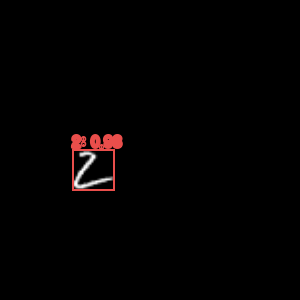

In [30]:
ultralytics_hub.inference(
    source="datasets/mnist_det/raw/10.png",
    draw=True,
)
PIL.Image.open(ultralytics_hub.draw_dir / "10.png")

100%|██████████| 25/25 [00:00<00:00, 27.37it/s]


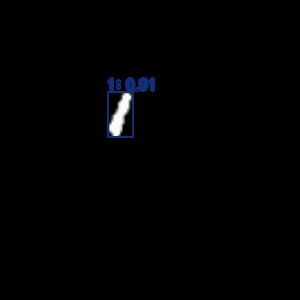

In [31]:
ultralytics_hub.inference(
    source="datasets/mnist_det/raw",
    recursive=True,
    draw=True,
)
PIL.Image.open(ultralytics_hub.draw_dir / "1.png")

### get inference informations

In [32]:
ultralytics_hub.get_inference_result()

[{'1.png': [{'category_id': 1,
    'bbox': [107.37403869628906,
     91.69528198242188,
     26.16375732421875,
     46.10255432128906],
    'area': 1206.2160432888195,
    'iscrowd': 0,
    'score': 0.9146654605865479}]},
 {'2.png': [{'category_id': 1,
    'bbox': [149.558349609375,
     177.26950073242188,
     15.940292358398438,
     42.1663818359375],
    'area': 672.1444541607052,
    'iscrowd': 0,
    'score': 0.9036419987678528}]},
 {'3.png': [{'category_id': 1,
    'bbox': [58.5820198059082,
     88.27410125732422,
     12.61246109008789,
     37.57154083251953],
    'area': 473.869596844801,
    'iscrowd': 0,
    'score': 0.8641519546508789}]},
 {'4.png': [{'category_id': 2,
    'bbox': [121.241455078125,
     158.77667236328125,
     40.83848571777344,
     47.66691589355469],
    'area': 1946.6446639292408,
    'iscrowd': 0,
    'score': 0.9752923846244812}]},
 {'5.png': [{'category_id': 2,
    'bbox': [248.9892120361328,
     16.775619506835938,
     28.735427856445312,
  

In [33]:
ultralytics_hub.get_inference_state()

{'status': 'success',
 'error_type': None,
 'error_msg': None,
 'step': 26,
 'total_step': 26}

## Export to onnx

In [34]:
ultralytics_hub.export_onnx()

/home/snuailab/anaconda3/envs/waffle-refactor/lib/python3.10/site-packages/ultralytics/nn/modules/head.py:49: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  elif self.dynamic or self.shape != shape:
/home/snuailab/anaconda3/envs/waffle-refactor/lib/python3.10/site-packages/ultralytics/utils/tal.py:254: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  for i, stride in enumerate(strides):
/home/snuailab/anaconda3/envs/waffle-refactor/lib/python3.10/site-packages/torch/onnx/utils.py:617: UserWarning: ONNX Preprocess - Removing mutation from node aten::sub_ on block input: 'tensor.1'. This changes gr

ExportOnnxResult(onnx_file=PosixPath('hubs/ultralytics_mnist_detection/weights/model.onnx'))

## Benchmark

In [35]:
ultralytics_hub.benchmark()

100%|██████████| 100/100 [00:03<00:00, 32.73it/s]


{'inference_time': 3.0563507080078125,
 'fps': 523.5001323008871,
 'image_size': [640, 640],
 'batch_size': 16,
 'precision': 'fp32',
 'device': 'cuda:0',
 'cpu_name': 'Intel(R) Core(TM) i7-10700K CPU @ 3.80GHz',
 'gpu_name': 'NVIDIA GeForce RTX 3070'}

## Export to waffle file

In [37]:
ultralytics_hub.export_waffle()

ExportWaffleResult(waffle_file=PosixPath('hubs/ultralytics_mnist_detection/ultralytics_mnist_detection.waffle'))

In [38]:
ultralytics_hub.get_export_waffle_state()

{'status': 'success',
 'error_type': None,
 'error_msg': None,
 'step': None,
 'total_step': None}

### import waffle file

In [41]:
import_hub = Hub.from_waffle_file(
    name="waffle_mnist_detection",
    waffle_file="hubs/ultralytics_mnist_detection/ultralytics_mnist_detection.waffle",
)

100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


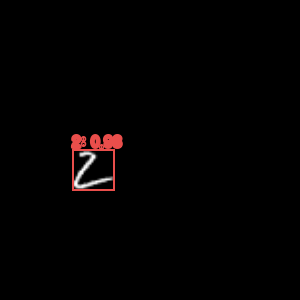

In [42]:
import_hub.inference(
    source="datasets/mnist_det/raw/10.png",
    draw=True,
)
PIL.Image.open(ultralytics_hub.draw_dir / "10.png")